# **Chapter 02**  
**┗ 공기질 데이터 분석 및 고객 리포트 기획**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* 🥉Session 1 - 「공기질 데이터 Trend 파악」
* 🥈Session 2 - 「고객 리포트 기획을 위한 지표 정의」
* 🥇Session 3 - 「고객 리포트 Story line 구성」

In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/part3_lecture_fastcampus/chapter02')
# '/content/drive/MyDrive/Colab Notebooks/ ← 여기 경로까지는 본인의 경로 입력, part3_lecture_fastcampus/chapter02' ← 변경X
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/Colab Notebooks/part3_lecture_fastcampus/chapter02'

## **문제상황 및 데이터 살펴보기**
---
> **시나리오** 🌏 (서비스기획자, 마케터, 필드 데이터 분석가)

```
A업체는 공기질 센서 측정기를 개발하여 판매하고 있다. 업계에 선두 주자 였으나 다양한 경쟁사가 등장하면서 판매량이 감소하고 있는 상황이다.  
단순히 제품 판매로만 영업이익을 발생시킬 수 없다고 판단하여, 새로운 서비스를 고객에게 제공하여 판매 촉진을 달성하려고 한다. 공기질 센서  
측정기로부터 수집되는 센서 데이터를 활용하여 고객에게 무상으로 '우리집 공기질 Report'제공하여 타 경쟁사 대비 우위를 선점하려고 한다.
```  

> **데이터 살펴보기**

* 일자별 시간 단위로 공기질 측정기에서 총 13개의 센서 데이터가 수집된다.
* 데이터 명세 ⬇

|Date|Time|CO(GT)|PT08.S1(CO)|NMHC(GT)|C6H6(GT)|PT08.S2(NMHC)|NOx(GT)|PT08.S3(NOx)|NO2(GT)|PT08.S4(NO2)|PT08.S5(O3)|T|RH|AH|
|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:---:|
|날짜|시간|일산화탄소|산화주석|비메타닉 탄화수소|벤젠농도|티타니아|Nox농도|산화 텅스텐(Nox)|NO2농도|산화 텅스텐(No2)|산화인듐|온도|상대습도|절대습도|

In [3]:
# ▶ Data read
import pandas as pd
df = pd.read_excel('chapter02_airquality.xlsx')
df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


## **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 제품 판매량 감소, 영업이익 감소
```  

> **기대효과**

```
▶ 제품 판매량 증가, 영업이익 증가
```

> **해결방안**

```
▶ 공기질 고객 Report 제공을 통해 경쟁사 대비 차별화 서비스 제공
▶ Session 1 🥉
 - 공기질 데이터에 대한 이해 + Time data 처리 방법
▶ Session 2 🥈
 - Report 작성을 위한 다양한 지표 개발 
▶ Session 3 🥇
 - 개발된 지표를 활용하여 고객 Report 개발 
```

> **성과측정**  

```
▶ Report 제공 전/후 판매량 비교, 설문조사를 통한 고객만족도 점수화
```

> **현업적용**  

```
▶ 공기질 측정기로 부터 실시간 센서 데이터 수집 및 DB 적재 시스템 구축  
▶ 수집된 센서 데이터 활용 고객 Report 대시보드 개발  
▶ 매 월 고객별 Report 출력 및 전송채널(e-mail, Kakao takl 등)을 통해 제공 
```

> **주요 코드 미리 살펴보기**  

```
▶ session 1 → replace(), to_datetime(), astype(str)
▶ session 2 → sns.distplot(), plt.axvline(), value_counts()
▶ session 3 → unique(), dt.hour(), plt.xticks
```

## **🥉Session 1**  
**┗ 공기질 데이터 Trend 파악**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인 

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  


In [4]:
# ▶ Data 형태 확인
# ▶ 9357 row, 15 col로 구성됨
print('df', df.shape)

df (9357, 15)


In [5]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

In [6]:
# ▶ Null 값 확인
print(df.isnull().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [7]:
# ▶ Outlier 확인, 음수값 확인
# ▶ 모든 센서 데이터에서 min 값이 -200으로 관찰됨. 자세하게 Raw data를 살펴보아야함
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [8]:
# ▶ 센서값이 음수인 Data 확인
# ▶ 정상적인 센서값에서 나올 수 있는 수치가 아니기 때문에 전처리가 필요함
df[df['T']== -200].head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
524,2004-04-01,14:00:00,1.7,-200.0,222,-200.0,-200.0,99.0,-200.0,72.0,-200.0,-200.0,-200.0,-200.0,-200.0
525,2004-04-01,15:00:00,1.9,-200.0,197,-200.0,-200.0,108.0,-200.0,81.0,-200.0,-200.0,-200.0,-200.0,-200.0
526,2004-04-01,16:00:00,2.3,-200.0,319,-200.0,-200.0,131.0,-200.0,93.0,-200.0,-200.0,-200.0,-200.0,-200.0
701,2004-04-08,23:00:00,2.0,-200.0,137,-200.0,-200.0,129.0,-200.0,106.0,-200.0,-200.0,-200.0,-200.0,-200.0
702,2004-04-09,00:00:00,2.4,-200.0,189,-200.0,-200.0,154.0,-200.0,109.0,-200.0,-200.0,-200.0,-200.0,-200.0


In [9]:
# ▶ -200이라는 Outlier를 먼저 Null 값으로 대체후, ffill을 통해 이전 Sensor값으로 치환
import numpy as np
df = df.replace(-200, np.NaN)
df=df.fillna(method='ffill') 

In [10]:
# ▶ 변경된 값 확인
# ▶ 모든 센서 값의 min 값이 음수가 없는 것을 확인
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.082195,1102.604396,270.496740,10.190299,942.422741,240.718147,832.618539,109.401453,1452.890358,1030.388426,18.315768,48.814853,1.017382
std,1.469801,219.599578,73.306853,7.565011,269.583076,206.611257,255.704654,47.210774,347.427351,410.906048,8.822898,17.354492,0.404829
min,0.100000,647.250000,7.000000,0.149048,383.250000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.175000,0.184679
25%,1.000000,938.250000,275.000000,4.401596,732.500000,97.000000,654.500000,73.000000,1227.750000,726.000000,11.875000,35.425000,0.726213
50%,1.700000,1061.500000,275.000000,8.276765,910.500000,174.000000,806.750000,102.000000,1459.750000,963.750000,17.575000,48.925001,0.987539
75%,2.800000,1237.250000,275.000000,14.019301,1117.250000,318.000000,967.500000,137.000000,1676.750000,1286.500000,24.325000,61.875000,1.306671
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


In [11]:
# ▶ Null 값 재확인
print(df.isnull().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


### · Data 전처리(Time data)  
---
* Time(시간) 데이터 다뤄보기


In [12]:
# ▶ 시간 데이터가 'Data'와 'Time'으로 나뉘어 있기 때문에 둘을 합친 하나의 새로운 col을 생성
# ▶ 데이터를 병합하기 위해서는 문자열(str)형태로만 가능하기 때문에 형변환 후 병합 수행
# ▶ 병합한 시간 데이터를 최종 Date time으로 변환하는 것으로 종료
import datetime
df['Date_merge'] = df['Date'].astype(str) + ' ' + df['Time'].astype(str)
df['Date_merge'] = pd.to_datetime(df['Date_merge'])
df.head(5)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Date_merge
0,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03-10 19:00:00
2,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03-10 20:00:00
3,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03-10 21:00:00
4,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03-10 22:00:00


In [13]:
# ▶ 새로 생성한 Col에 위치를 1번으로 변경
# ▶ 전처리 완료!
df = df[['Date_merge', 'Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
         'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
         'PT08.S5(O3)', 'T', 'RH', 'AH']]
df.head(5)

,Date_merge,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10 18:00:00,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10 19:00:00,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10 20:00:00,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10 21:00:00,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10 22:00:00,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [15]:
# ▶ 최종으로 data info 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date_merge     9357 non-null   datetime64[ns]
 1   Date           9357 non-null   datetime64[ns]
 2   Time           9357 non-null   object        
 3   CO(GT)         9357 non-null   float64       
 4   PT08.S1(CO)    9357 non-null   float64       
 5   NMHC(GT)       9357 non-null   float64       
 6   C6H6(GT)       9357 non-null   float64       
 7   PT08.S2(NMHC)  9357 non-null   float64       
 8   NOx(GT)        9357 non-null   float64       
 9   PT08.S3(NOx)   9357 non-null   float64       
 10  NO2(GT)        9357 non-null   float64       
 11  PT08.S4(NO2)   9357 non-null   float64       
 12  PT08.S5(O3)    9357 non-null   float64       
 13  T              9357 non-null   float64       
 14  RH             9357 non-null   float64       
 15  AH             9357 n

### · 공기질 Trend 파악  
---
* 시간에 따라서 변화하는 센서 데이터의 Trend(추이)를 파악
* matplotlib.pyplot / seaborn 사용법

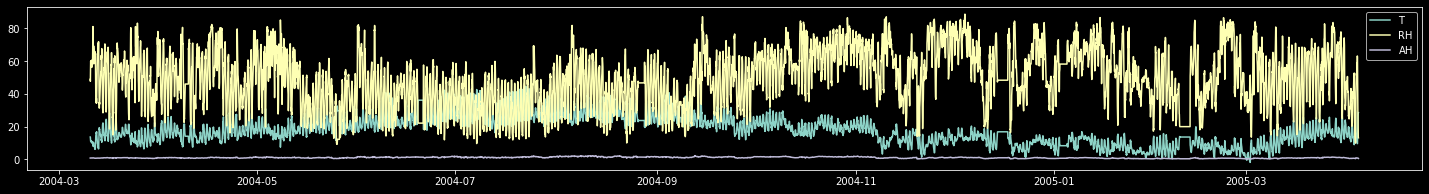

In [16]:
# ▶ 2004-03 ~ 2005-03, 1년치 Data
# ▶ x, y data를 설정하여 Plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

plt.plot(df['Date_merge'], df['T'], label='T')
plt.plot(df['Date_merge'], df['RH'], label='RH')
plt.plot(df['Date_merge'], df['AH'], label='AH')

plt.legend()
plt.gcf().set_size_inches(25, 3)

In [ ]:
# ▶ 화씨온도(℉) → 섭씨온도(℃)
df['T'] = (df['T'] - 32) * 5/9

In [ ]:
# ▶ 섭씨온도(℃) → 화씨온도(℉)
df['T'] = 9/5 * df['T'] + 32

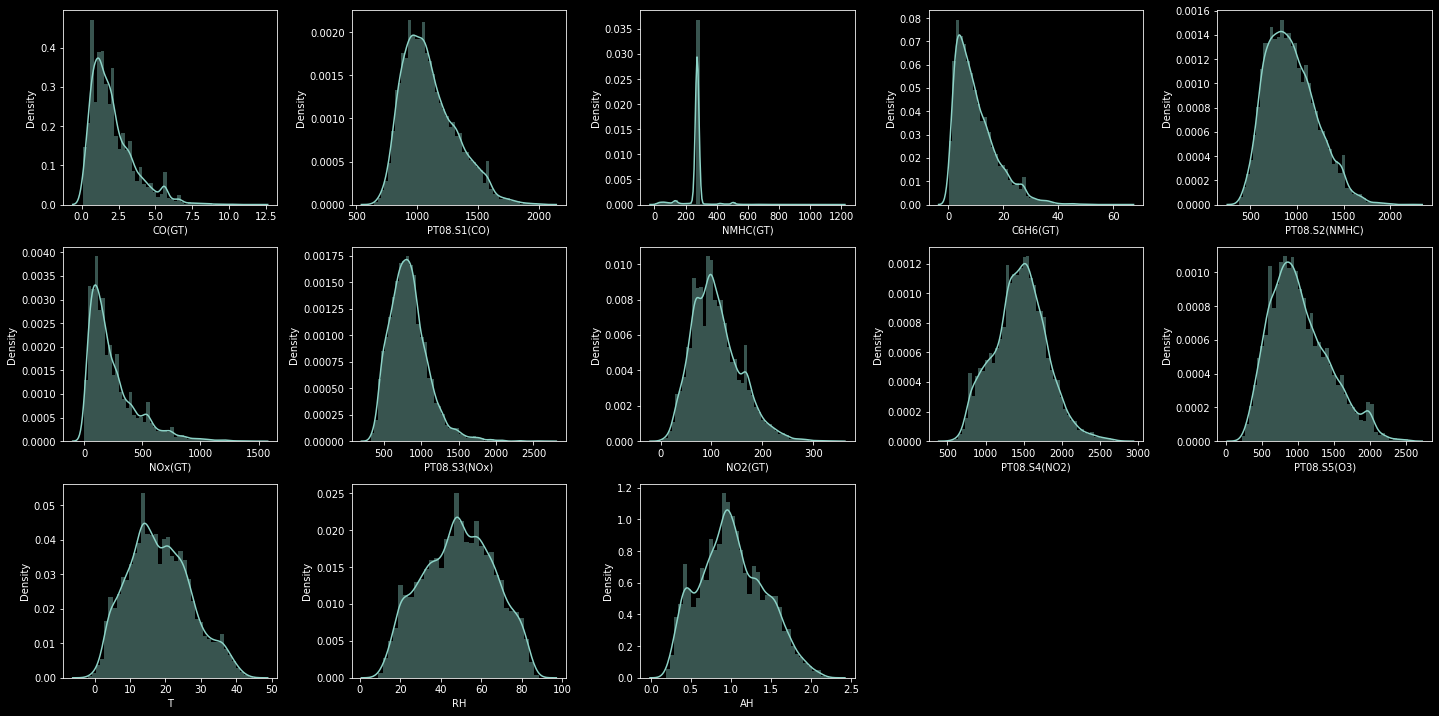

In [17]:
# ▶ 모든 센서 데이터에 대해 분포를 확인

for i in range(3,16):
    plt.subplot(3,5,i-2)
    plt.grid(False)
    sns.distplot(df.iloc[:,i])

plt.gcf().set_size_inches(20, 10)
plt.tight_layout()
plt.show();

## **🥈Session 2**  
**┗ 고객 리포트 기획을 위한 지표 정의**  
---



### · 지표 정의 (기준치 설정)
---
* Report 기획에 필요한 지표들을 정의
* 큰 내용에서 작은 내용으로 drill down


In [18]:
# ▶ 가장 기본적인 Min / Max / Average
for i in range(3,16):
  print(df.columns[i],'▶' ,'Min :', df.iloc[:,i].min(), 'Max :', df.iloc[:,i].max(), 'average :', df.iloc[:,i].mean())

CO(GT) ▶ Min : 0.1 Max : 11.9 average : 2.0821951480175698
PT08.S1(CO) ▶ Min : 647.25 Max : 2039.75 average : 1102.604395995867
NMHC(GT) ▶ Min : 7.0 Max : 1189.0 average : 270.4967404082505
C6H6(GT) ▶ Min : 0.14904773883376646 Max : 63.74147644829163 average : 10.190298936251546
PT08.S2(NMHC) ▶ Min : 383.25 Max : 2214.0 average : 942.4227405507465
NOx(GT) ▶ Min : 2.0 Max : 1479.0 average : 240.718146841937
PT08.S3(NOx) ▶ Min : 322.0 Max : 2682.75 average : 832.6185387054256
NO2(GT) ▶ Min : 2.0 Max : 339.7 average : 109.40145345730474
PT08.S4(NO2) ▶ Min : 551.0 Max : 2775.0 average : 1452.890358376973
PT08.S5(O3) ▶ Min : 221.0 Max : 2522.75 average : 1030.388425777493
T ▶ Min : -1.8999999761581 Max : 44.60000038147 average : 18.315768049064722
RH ▶ Min : 9.1750001907349 Max : 88.72500038147 average : 48.81485254062747
AH ▶ Min : 0.1846790209991702 Max : 2.2310357155831864 average : 1.017381945032565


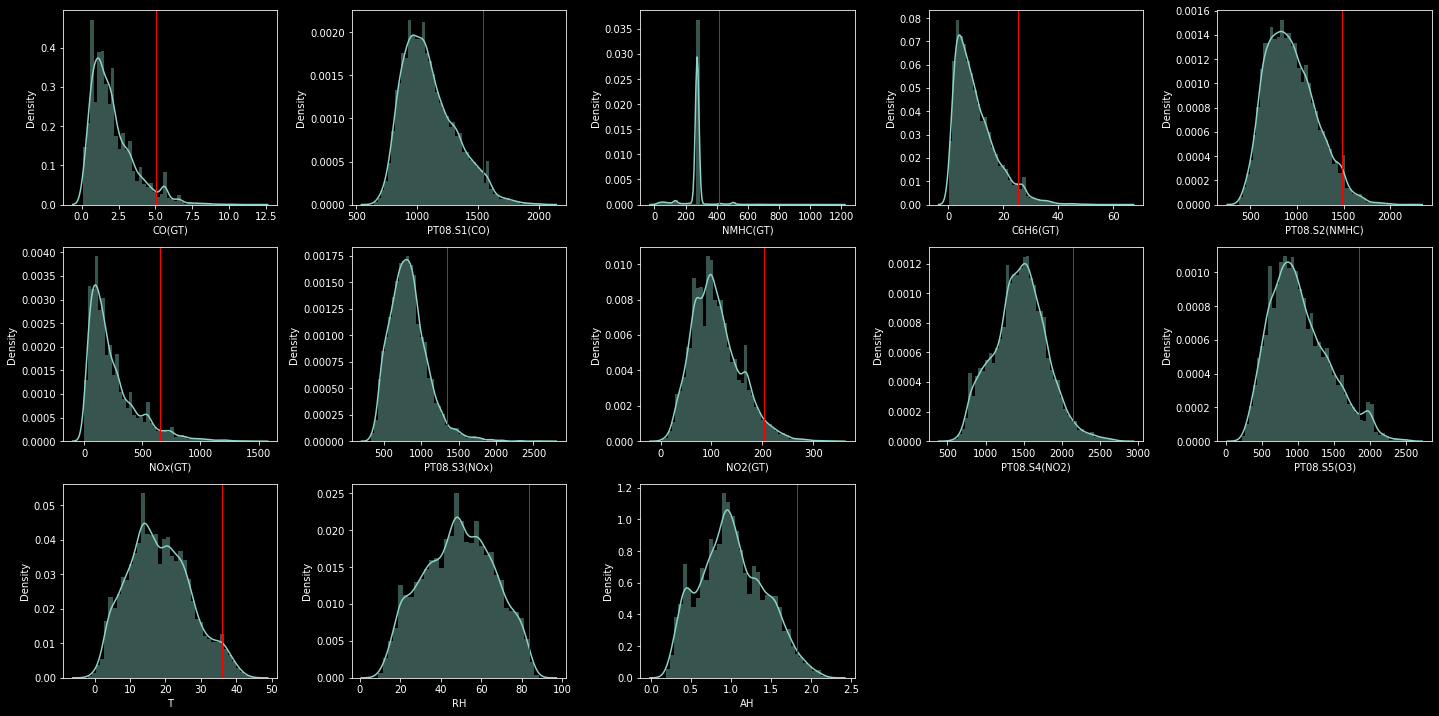

In [19]:
# ▶ Sensor data의 기준치를 설정
# ▶ T, RH, AH를 제외한 센서값에 대해서는 평균 대비 2sd(표준편차)가 넘어가게 되면 기준치 초과로 설정

for i in range(3,16):
    plt.subplot(3,5,i-2)
    plt.grid(False)
    sns.distplot(df.iloc[:,i])
    plt.axvline(df.iloc[:,i].mean() + 2*df.iloc[:,i].std(), color='r', linewidth=1)

plt.gcf().set_size_inches(20, 10)
plt.tight_layout()
plt.show();

### · 지표 정의 (취약 시간대 탐색)  
---
* Report 기획에 필요한 지표들을 정의
* 큰 내용에서 작은 내용으로 drill down



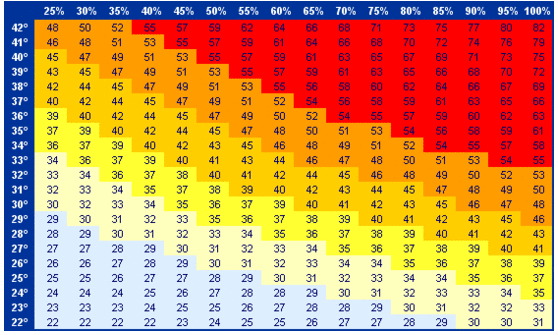

In [ ]:
from IPython.display import Image
Image("img1.PNG")

In [ ]:
# ▶ 온도 취약 시간대 탐색(1) - 일(Day)
df[df['T'] > 35]['Date'].value_counts().head(5)

2004-06-20    24
2004-06-19    11
2004-07-21     9
2004-07-22     9
2004-07-23     9
Name: Date, dtype: int64

In [20]:
# ▶ 온도 취약 시간대 탐색(2) - 월(Month)
# ▶ 월 별로 보기위해 월 col 새로 생성 
df['month']=df['Date'].astype(str).str.slice(start=0, stop=7)

In [ ]:
df[df['T'] > 35]['month'].value_counts()

2004-07    166
2004-08    129
2004-06    121
2004-09     28
Name: month, dtype: int64

In [ ]:
# ▶ 온도 취약 시간대 탐색(3) - 시간(Hour)
df[df['T'] > 35]['Time'].value_counts().head(5)

16:00:00    68
15:00:00    64
17:00:00    59
13:00:00    56
14:00:00    52
Name: Time, dtype: int64

In [ ]:
# ▶ 습도 취약 시간대 탐색(1) - 일(Day)
df[df['RH'] > 60]['Date'].value_counts().head(5)

2004-11-28    24
2004-11-23    24
2004-12-05    24
2005-01-10    24
2004-12-04    24
Name: Date, dtype: int64

In [ ]:
# ▶ 습도 취약 시간대 탐색(2) - 월(Month)
df[df['RH'] > 60]['month'].value_counts().head(5)

2004-10    446
2004-11    366
2004-12    335
2005-01    291
2005-03    254
Name: month, dtype: int64

In [ ]:
# ▶ 습도 취약 시간대 탐색(3) - 시간(Hour)
df[df['RH'] > 60]['Time'].value_counts().head(5)

06:00:00    203
05:00:00    199
04:00:00    197
07:00:00    196
03:00:00    181
Name: Time, dtype: int64

### · 지표 정의 (상쾌 시간대 탐색)  
---
* Report 기획에 필요한 지표들을 정의
* 큰 내용에서 작은 내용으로 drill down



In [22]:
# ▶ 온도(T) : 25~27 / 습도(RH) : 35~40, 상쾌구간 정의
df_good = df[ ((df['T'] >= 25) & (df['T'] <= 27)) & ((df['RH'] >= 35) & (df['RH'] <= 40)) ]
df_good.head(5)

,Date_merge,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,month
1077,2004-04-24 15:00:00,2004-04-24,15:00:00,1.7,1222.50,192.0,8.953194,937.50,91.0,883.50,89.0,1610.00,879.50,25.550000,36.049999,1.162886,2004-04
1609,2004-05-16 19:00:00,2004-05-16,19:00:00,2.7,1403.25,275.0,15.060586,1150.50,147.0,747.00,125.0,1820.25,1124.75,25.475000,37.350000,1.199513,2004-05
1751,2004-05-22 17:00:00,2004-05-22,17:00:00,2.8,1466.25,275.0,15.807518,1173.75,152.0,680.00,115.0,1964.75,1301.50,25.450000,39.825000,1.277117,2004-05
1777,2004-05-23 19:00:00,2004-05-23,19:00:00,1.1,1085.25,275.0,5.849489,804.75,69.0,972.25,65.0,1528.25,717.75,25.275001,36.275000,1.151340,2004-05
2081,2004-06-05 11:00:00,2004-06-05,11:00:00,1.1,883.00,275.0,5.287938,777.75,61.0,1129.50,57.0,1544.50,607.50,25.875000,36.900000,1.213267,2004-06


In [23]:
# ▶ 온도(T) : 25~27 / 습도(RH) : 35~40, 상쾌구간 정의
df_good['T'].mean(), df_good['RH'].mean()

(25.843192474383176, 36.999061134499506)

In [24]:
# ▶ 상쾌 Date
df_good['Date'].value_counts().head(5)

2004-09-08    9
2004-09-05    4
2004-09-06    4
2004-07-08    3
2004-06-14    3
Name: Date, dtype: int64

In [25]:
# ▶ 상쾌 month
df_good['month'].value_counts().head(5)

2004-09    25
2004-06    17
2004-07    15
2004-08     9
2004-05     3
Name: month, dtype: int64

In [26]:
# ▶ 상쾌 time
df_good['Time'].value_counts().head(5)

09:00:00    10
22:00:00     9
21:00:00     5
07:00:00     5
19:00:00     5
Name: Time, dtype: int64

### · 지표 정의 (환기  시간대 탐색)  
---
* Report 기획에 필요한 지표들을 정의
* 큰 내용에서 작은 내용으로 drill down



In [ ]:
# ▶ CO(GT) 일산화탄소
df.head(5)

,Date_merge,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,month
0,2004-03-10 18:00:00,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03
1,2004-03-10 19:00:00,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03
2,2004-03-10 20:00:00,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03
3,2004-03-10 21:00:00,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03
4,2004-03-10 22:00:00,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03


In [33]:
# ▶ CO(GT) 일산화탄소가 평균 + 2sd 이상이면 상위에서 정의한 기준치가 초과되는 영역
# ▶ 기준치가 초과되면 환기가 필요함
df_co = df[df['CO(GT)'] > df['CO(GT)'].mean() + 2*df['CO(GT)'].std()]['Time'].value_counts()
df_co.head(5)

19:00:00    77
20:00:00    59
18:00:00    56
09:00:00    44
17:00:00    31
Name: Time, dtype: int64

In [34]:
# ▶ 가독성 좋은 DataFrame으로 변환
df_co = pd.DataFrame(df_co).reset_index()
df_co.columns = ['Time', 'CO(GT)']
df_co.head(5)

,Time,CO(GT)
0,19:00:00,77
1,20:00:00,59
2,18:00:00,56
3,09:00:00,44
4,17:00:00,31


In [35]:
# ▶ 변환된 데이터 타입 확인
df_co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    24 non-null     object
 1   CO(GT)  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [36]:
# ▶ Time data 변환 
df_co = df_co.sort_values(by=['Time'])
df_co['Time'] = pd.to_datetime(df_co['Time'].astype(str))
df_co = df_co.reset_index(drop=True)

In [37]:
df_co = df_co.sort_values(by=['Time'])
df_co.head(5)

,Time,CO(GT)
0,2022-03-12 00:00:00,9
1,2022-03-12 01:00:00,8
2,2022-03-12 02:00:00,8
3,2022-03-12 03:00:00,8
4,2022-03-12 04:00:00,8


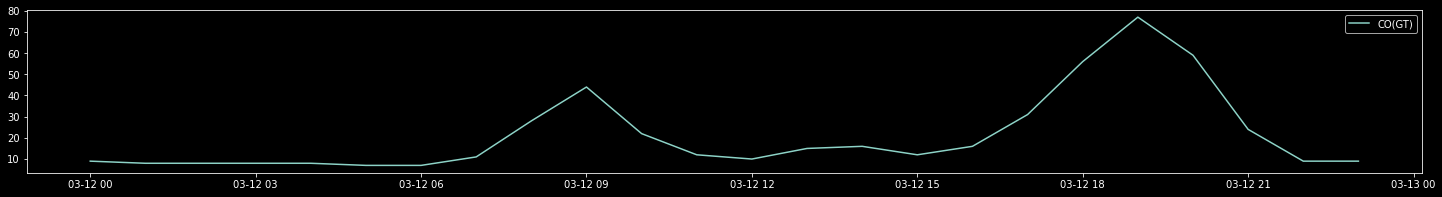

In [38]:
# ▶ 오전 9시, 오후 18~20시 CO(GT) peak 시간 확인
plt.style.use(['dark_background'])
plt.plot(df_co['Time'], df_co['CO(GT)'], label='CO(GT)')
plt.legend()
plt.gcf().set_size_inches(25, 3)

## **🥇Session 3**  
**┗ 고객 리포트 Story line 구성**  
---


### · 목차 선정
---
* Report의 목적 및 Contents 설계
* Session 2에서 생성한 지표들 활용하여 Report 작성


[Report 목차]  
```
고객이 공기질 리포트를 받아 보았을 때, 현재 우리집 공기질 상황이 어떠한지 Summary가 되어야 하고, 상쾌한 날/불쾌한 날에 대해 인지할 수 있으며  
패턴 분석을 통해 적절한 환기 시간을 알려주어 상쾌한 날이 더 많아 질 수 있게 하는 것
```
(1) 우리집 공기질 현황
 - 온/습도 모니터링
 - 유해물질 기준치 초과 횟수 (※ 시간 단위)

(2) 상쾌한 날과 불쾌한 날 횟수 
 - 1년 중 상쾌한 날 횟수, 상쾌한 달 
 - 1년 중 불쾌한 날 횟수, 불쾌한 달  

  (※ 상쾌 : 평균 온도 22-26℃, 평균 습도 30-40% / 불쾌 : 평균 온도 26℃ 이상, 평균 습도 50% 이상)

(3) 불쾌한 시간 상세 분석
 - 불쾌 시간대 현황
 - 환기 시간대 추천 

#### · (1) 우리집 공기질 현황
---
 * 온/습도 모니터링
 * 유해물질 기준치 초과 횟수 (※ 시간 단위)


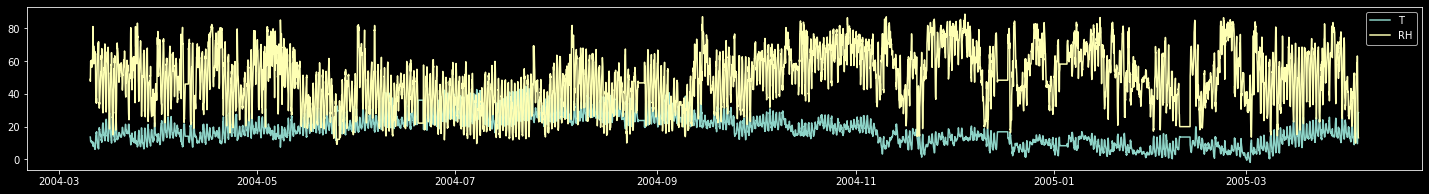

In [39]:
# ▶ 1년 동안 우리집 온도 및 습도 모니터링
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use(['dark_background'])
plt.plot(df['Date_merge'], df['T'], label='T')
plt.plot(df['Date_merge'], df['RH'], label='RH')
plt.legend()
plt.gcf().set_size_inches(25, 3)

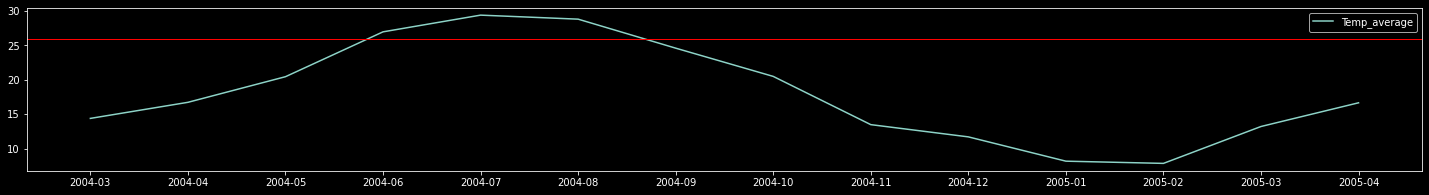

In [42]:
# ▶ 월별 평균 온도 
plt.plot(pd.DataFrame(df['T'].groupby(df['month']).mean()), label = "Temp_average")
plt.axhline(26, color='r', linewidth=1)
plt.legend()
plt.gcf().set_size_inches(25, 3)

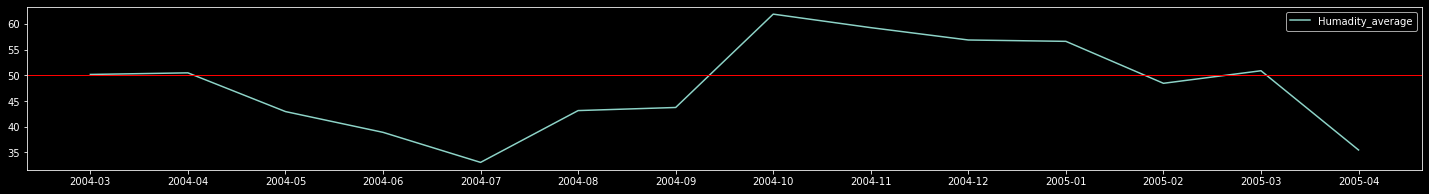

In [45]:
# ▶ 월별 평균 습도
plt.plot(pd.DataFrame(df['RH'].groupby(df['month']).mean()), label = "Humadity_average")
plt.axhline(50, color='r', linewidth=1)
plt.legend()
plt.gcf().set_size_inches(25, 3)

In [ ]:
df.head(5)

,Date_merge,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,month
0,2004-03-10 18:00:00,2004-03-10,18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754,2004-03
1,2004-03-10 19:00:00,2004-03-10,19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487,2004-03
2,2004-03-10 20:00:00,2004-03-10,20:00:00,2.2,1402.00,88.0,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239,2004-03
3,2004-03-10 21:00:00,2004-03-10,21:00:00,2.2,1375.50,80.0,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713,2004-03
4,2004-03-10 22:00:00,2004-03-10,22:00:00,1.6,1272.25,51.0,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794,2004-03


In [46]:
# ▶ 유해물질 기준치 초과 횟수
for i in range(3,13) :
  print(df.columns[i],":", round(len(df[df.iloc[:,i] > df.iloc[:,i].mean() + 2*df.iloc[:,i].std()]) / 24,0), "days")

CO(GT) : 21.0 days
PT08.S1(CO) : 17.0 days
NMHC(GT) : 12.0 days
C6H6(GT) : 20.0 days
PT08.S2(NMHC) : 16.0 days
NOx(GT) : 21.0 days
PT08.S3(NOx) : 14.0 days
NO2(GT) : 15.0 days
PT08.S4(NO2) : 10.0 days
PT08.S5(O3) : 18.0 days


#### · (2) 상쾌한 날과 불쾌한 날
---
 * 1년 중 상쾌한 날 횟수, 상쾌한 달 
 * 1년 중 불쾌한 날 횟수, 불쾌한 달  
 (※ 상쾌 : 평균 온도 22-26℃, 평균 습도 30-40% / 불쾌 : 평균 온도 26℃ 이상, 평균 습도 50% 이상)




In [54]:
# ▶ 일 별 평균 온/습도로 새로운 Data Frame 만들기
df_good_bad = pd.DataFrame({'Date':df['Date'].unique(),
                            'T_D': list(df['T'].groupby(df['Date']).mean()),
                            'RH_D': list(df['RH'].groupby(df['Date']).mean())})

df_good_bad.head(5)

,Date,T_D,RH_D
0,2004-03-10,12.020833,54.883334
1,2004-03-11,9.833333,64.069791
2,2004-03-12,11.292708,51.107292
3,2004-03-13,12.866319,51.530903
4,2004-03-14,16.016667,48.843750


In [55]:
# ▶ 상쾌한날 총 14일
df_good_bad[ ((df_good_bad['T_D'] >= 22) &  (df_good_bad['T_D'] <= 26)) & ((df_good_bad['RH_D'] >= 30) &  (df_good_bad['RH_D'] <= 40)) ]

,Date,T_D,RH_D
67,2004-05-16,22.359375,34.831250
69,2004-05-18,23.740972,30.984722
70,2004-05-19,22.989583,37.689583
71,2004-05-20,23.642361,37.434375
72,2004-05-21,23.471875,34.728125
78,2004-05-27,22.863542,32.075000
81,2004-05-30,23.715625,31.282292
86,2004-06-04,23.394792,39.429167
89,2004-06-07,25.553125,37.701042
104,2004-06-22,25.508333,37.974653


In [56]:
# ▶ 불쾌한날 총 3일
df_good_bad[ (df_good_bad['T_D'] >= 26) & (df_good_bad['RH_D'] >= 50)]

,Date,T_D,RH_D
148,2004-08-05,26.297917,56.647917
149,2004-08-06,26.483333,58.032292
151,2004-08-08,28.046181,50.145139


#### · (3) 불쾌한 시간 상세 분석
---
 * 불쾌 시간대 현황
 * 환기 시간대 추천 



In [57]:
# ▶ 불쾌한날 조건에 따른 데이터 Filter
df_bad = df[ (df['T'] >= 26) & (df['RH'] >= 50)]['Time'].value_counts()
df_bad = pd.DataFrame(df_bad).reset_index()
df_bad.columns = ['Time', 'bad_hour']

df_bad=df_bad.sort_values(by=['Time'])
df_bad['Time']=pd.to_datetime(df_bad['Time'].astype(str))
df_bad=df_bad.reset_index(drop=True)

In [58]:
df_bad.head(5)

,Time,bad_hour
0,2022-03-12 00:00:00,11
1,2022-03-12 01:00:00,10
2,2022-03-12 02:00:00,6
3,2022-03-12 03:00:00,3
4,2022-03-12 04:00:00,5


In [59]:
# ▶ 시간 데이터만 추출
df_bad['Time'] = df_bad['Time'].dt.hour

In [60]:
df_bad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Time      20 non-null     int64
 1   bad_hour  20 non-null     int64
dtypes: int64(2)
memory usage: 448.0 bytes


In [62]:
# ▶ 비어 있는 시간대에 0 데이터 삽입
df_append = pd.DataFrame({'Time':[10, 12, 13, 14],
                          'bad_hour':[0,0,0,0]})
df_append.head(5)

,Time,bad_hour
0,10,0
1,12,0
2,13,0
3,14,0


In [63]:
# ▶ Data Concat
df_bad1=pd.concat([df_bad, df_append], axis=0).reset_index(drop=True)

In [64]:
# ▶ 다시 시간 기준으로 오름차순 정렬
df_bad1=df_bad1.sort_values(by=['Time']).reset_index(drop=True)

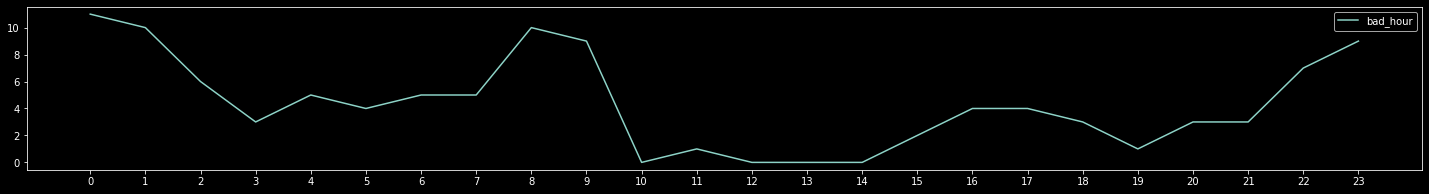

In [67]:
# ▶ 불쾌 시간대 
plt.plot(df_bad1['Time'], df_bad1['bad_hour'], label='bad_hour')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
plt.legend()
plt.gcf().set_size_inches(25, 3)

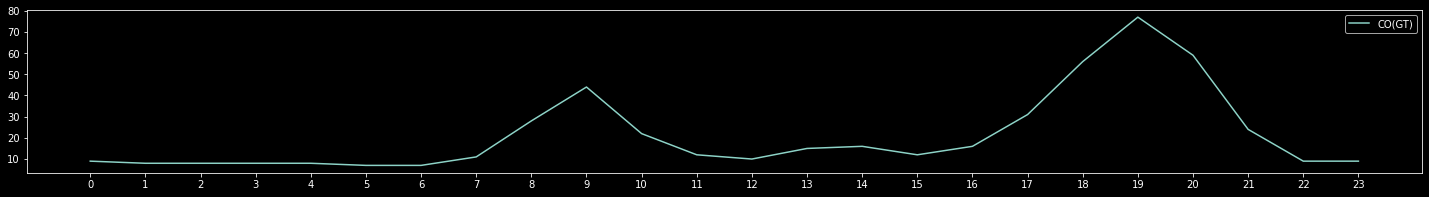

In [68]:
s# ▶ 환기 추천 시간대 
plt.style.use(['dark_background'])
plt.plot(df_co['CO(GT)'], label='CO(GT)')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])
plt.legend()
plt.gcf().set_size_inches(25, 3)